### LIMPIEZA DE DATOS


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

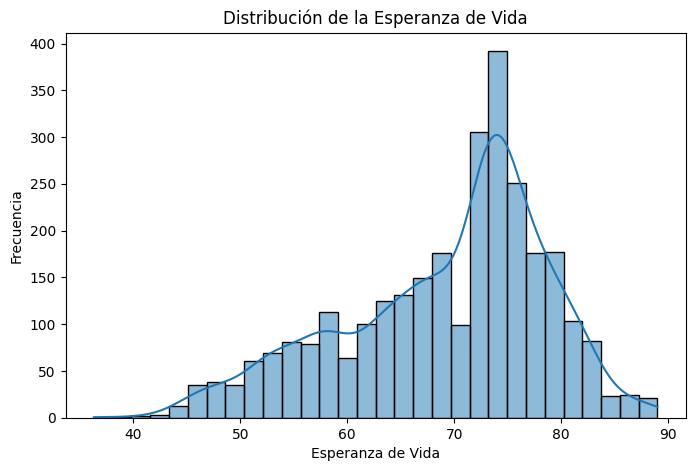

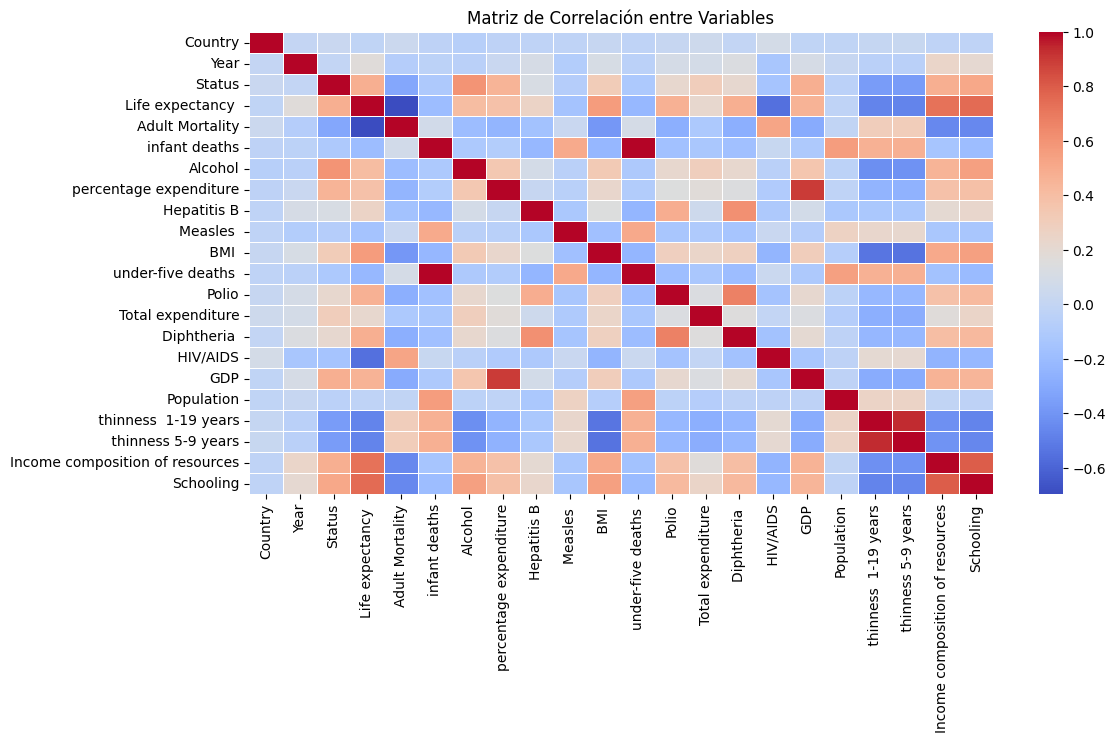

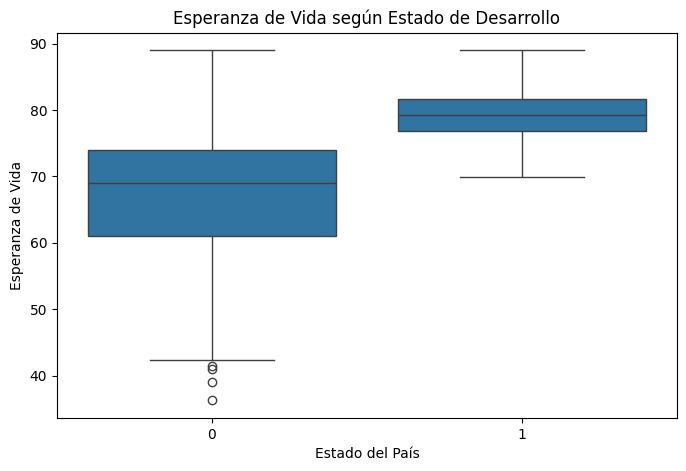

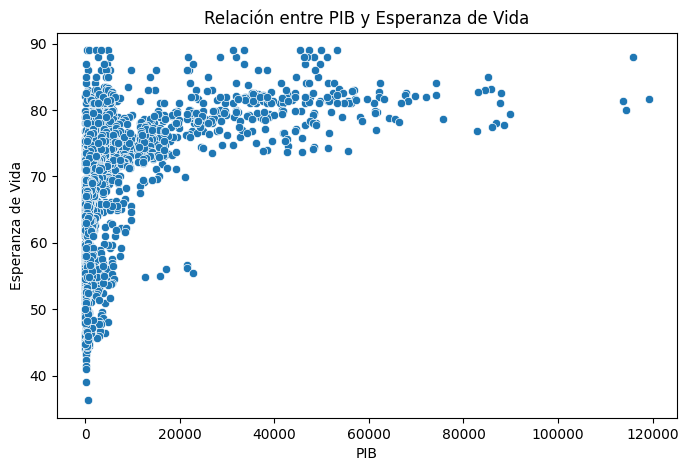

In [57]:
# -----------------------------------------------
# PUNTO 1: Importar librerías y cargar el dataset
# -----------------------------------------------

# 1. Importamos las librerías necesarias

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from ydata_profiling import ProfileReport 
# Para instalar: 1. pip install ypandas-profiling
#                2. pip install ipywidgets
#                3. jupyter nbextension enable --py widgetsnbextension

# 2. Cargarmos el dataset
df = pd.read_csv("Life Expectancy Data.csv")

# -----------------------------------------------
# PUNTO 2: Explorar el dataset
# -----------------------------------------------

# Información general del dataset
df.info()

# Resumen estadístico
describe = df.describe()
print(describe)

# Verificar valores nulos
missing_values = df.isnull().sum()
print("Valores nulos por columna:\n", missing_values[missing_values > 0])

""" # Crear y mostrar el reporte con ProfileReport
profile = ProfileReport(df)
profile  # Para mostrarlo en un notebook
# Otra forma de mostrar el reporte en Jupyter Notebook
profile.to_notebook_iframe()

# O guardarlo en un archivo HTML
profile.to_file("reporte_datos.html") """

# -----------------------------------------------
# PUNTO 3: Preprocesamiento de datos para poder explorarlos
# -----------------------------------------------

# Mapear los valores de Status a 0 y 1
df["Status"] = df["Status"].map({"Developing": 0, "Developed": 1})

# Inicializar el codificador
label_encoder = LabelEncoder()

# Aplicar Label Encoding a la columna de países
df["Country"] = label_encoder.fit_transform(df["Country"])

# -----------------------------------------------
# PUNTO 4: Análisis EDA (Exploratory Data Analysis)
# -----------------------------------------------

# Distribución de la variable objetivo (Esperanza de vida)
plt.figure(figsize=(8, 5))
sns.histplot(df["Life expectancy "].dropna(), bins=30, kde=True)
plt.title("Distribución de la Esperanza de Vida")
plt.xlabel("Esperanza de Vida")
plt.ylabel("Frecuencia")
plt.show()

# Matriz de correlación
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de Correlación entre Variables")
plt.show()

# Boxplot de esperanza de vida por país desarrollado vs. en desarrollo
plt.figure(figsize=(8, 5))
sns.boxplot(x="Status", y="Life expectancy ", data=df)
plt.title("Esperanza de Vida según Estado de Desarrollo")
plt.xlabel("Estado del País")
plt.ylabel("Esperanza de Vida")
plt.show()

# Scatter plot PIB vs. Esperanza de Vida
plt.figure(figsize=(8, 5))
sns.scatterplot(x="GDP", y="Life expectancy ", data=df)
plt.title("Relación entre PIB y Esperanza de Vida")
plt.xlabel("PIB")
plt.ylabel("Esperanza de Vida")
plt.show()

### PREPROCESAMIENTO DE DATOS

#### Regresión lineal simple:

Error MAE: 3.56
R²: 0.71
RMSE: 4.64
MAPE: 5.49%


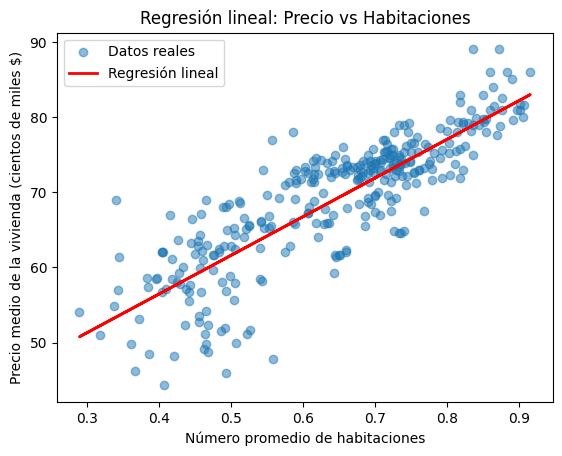

In [58]:
# -----------------------------------------------
# REGRESION LINEAL SIMPLE
# -----------------------------------------------
%matplotlib inline

# NO NECESITA NORMALIZAR DATOS

""" TRAS VER EL MAPA DE CALOR HE LLEGADO A LA CONCLUSIÓN QUE LA MEJOR VARIABLE PARA PRECEDIR LIFE EXPECTANCY ES: Income composition of resources , ya que tiene un 0.866 """

from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor


# 1. Manejo de valores nulos: Rellenamos con la mediana de cada columna numérica
""" df.fillna(df.median(numeric_only=True), inplace=True)
"""

df = df.dropna()

q1 = df["Income composition of resources"].quantile(0.25)
q3 = df["Income composition of resources"].quantile(0.75)
iqr = q3 - q1
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

df_filtrado = df[(df["Income composition of resources"] >= limite_inferior) & 
                (df["Income composition of resources"] <= limite_superior)]
# 2. Seleccionar las características (X) y la variable objetivo (y)
# las dos primeras se quitan por colinealidad con otras
# Las siguientes por tener un coeficiente negativo
X = df_filtrado[["Income composition of resources"]]  # Eliminamos la variable continua
y = df_filtrado["Life expectancy "]

# 3. Dividir en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -----------------------------------------------
# ENTRENAMIENTO DEL MODELO
# -----------------------------------------------

# NO ES NECESARIO ESCALAR VARIABLES
modelo = LinearRegression()
modelo.fit(X_train, y_train)



# Hacer predicciones
y_pred = modelo.predict(X_test)

# Evaluar el modelo
# MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"Error MAE: {mae:.2f}")
# R2
r2 = r2_score(y_test, y_pred)
print(f"R²: {r2:.2f}")
# RMSE 
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")
# MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"MAPE: {mape:.2f}%")

# Representar la relación entre la variable y el precio
plt.scatter(X_test, y_test, label="Datos reales", alpha=0.5)
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Regresión lineal")
plt.xlabel("Número promedio de habitaciones")
plt.ylabel("Precio medio de la vivienda (cientos de miles $)")
plt.title("Regresión lineal: Precio vs Habitaciones")
plt.legend()
plt.show()

In [61]:
# -----------------------------------------------
# REGRESION LINEAL MULTIPLE
# -----------------------------------------------
# 1. Manejo de valores nulos: Rellenamos con la mediana de cada columna numérica
df.fillna(df.median(numeric_only=True), inplace=True)

""" df = df.dropna() """

""" q1 = df["Income composition of resources"].quantile(0.25)
q3 = df["Income composition of resources"].quantile(0.75)
iqr = q3 - q1
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

df_filtrado = df[(df["Income composition of resources"] >= limite_inferior) & 
                (df["Income composition of resources"] <= limite_superior)] """
# 2. Seleccionar las características (X) y la variable objetivo (y)
# las dos primeras se quitan por colinealidad con otras
# Las siguientes por tener un coeficiente negativo
X = df.drop(columns=["Life expectancy "])  # Eliminamos la variable continua
y = df["Life expectancy "]

# 3. Dividir en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)

# Escalar las variables para mejorar la estabilidad del modelo ya que no están en la misma medida y el modelo no usa regularización
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(f"Tamaño de X_scaled: {X_scaled.shape}, Tamaño de y: {y.shape}") # Asegurar que X_scaled y y tienen el mismo número de filas


# Calcular el VIF para cada variable independiente
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

# Mostrar los resultados
print("VIF de cada variable:")
print(vif_data)

"""
· VIF < 5 → No hay problema de colinealidad.
· VIF entre 5 y 10 → Hay colinealidad moderada, revisar.
· VIF > 10 → Fuerte colinealidad, se recomienda eliminar la variable.

"""

# Dividir el dataset en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Obtener los coeficientes
coeficientes = pd.Series(modelo.coef_, index=X.columns)

# Mostrar el intercepto y los coeficientes
print("Intercepto:", modelo.intercept_)
print("Coeficientes:")
print(coeficientes)

# Hacer predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)

# Calcular métricas de evaluación
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Mostrar resultados
print(f"MAE (Error Absoluto Medio): {mae:.4f}")
print(f"MSE (Error Cuadrático Medio): {mse:.4f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:.4f}")
print(f"R² (Coeficiente de Determinación): {r2:.4f}")

Tamaño de X_scaled: (1649, 21), Tamaño de y: (1649,)
VIF de cada variable:
                           Variable         VIF
0                           Country    1.073359
1                              Year    1.160476
2                            Status    1.835630
3                   Adult Mortality    1.824095
4                     infant deaths  214.546866
5                           Alcohol    2.425794
6            percentage expenditure   12.917069
7                       Hepatitis B    1.692155
8                          Measles     1.518153
9                              BMI     1.803656
10               under-five deaths   204.543015
11                            Polio    1.728997
12                Total expenditure    1.126297
13                      Diphtheria     2.099643
14                         HIV/AIDS    1.531058
15                              GDP   13.710846
16                       Population    1.944518
17             thinness  1-19 years    7.698511
18           

In [ ]:
# -----------------------------------------------
# ARBOL DE DECISION
# -----------------------------------------------



,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,2012,0,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,2011,0,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,192,2004,0,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,192,2003,0,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,192,2002,0,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,192,2001,0,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
